In [1]:
import pandas as pd

In [2]:
ad=pd.read_csv(r'D:\Imarticus Learning\DATASETS\adultKNN.csv')

In [3]:
ad.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
import numpy as np

In [5]:
ad=ad.replace('?',np.nan)

In [6]:
ad=ad.rename(columns={'native-country':'native_country','marital-status':'marital_status','capital-loss':'capital_loss','educational-num':'educational_num','capital-gain':'capital_gain','hours-per-week':'hours_per_week'})

In [7]:
ad.workclass.fillna('Private',inplace=True)
ad.occupation.fillna('Prof-specialty',inplace=True)
ad.native_country.fillna('United-States',inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
ad.workclass.replace({'Private':4, 'Local-gov':5, 'Self-emp-not-inc':2, 'Federal-gov':7,
       'State-gov':6, 'Self-emp-inc':3, 'Without-pay':1, 'Never-worked':0},inplace=True)
ad.education.replace({'11th':6, 'HS-grad':8, 'Assoc-acdm':7, 'Some-college':7, '10th':5,
       'Prof-school':10, '7th-8th':3, 'Bachelors':9, 'Masters':10, 'Doctorate':11,
       '5th-6th':2, 'Assoc-voc':7, '9th':4, '12th':7, '1st-4th':1, 'Preschool':0},inplace=True)
ad.marital_status.replace({'Never-married':0, 'Married-civ-spouse':3, 'Widowed':2, 'Divorced':1,
       'Separated':5, 'Married-spouse-absent':4, 'Married-AF-spouse':6},inplace=True)
ad.occupation.replace({'Machine-op-inspct':2, 'Farming-fishing':3, 'Protective-serv':4,
       'Prof-specialty':5, 'Other-service':6, 'Craft-repair':7, 'Adm-clerical':8,
       'Exec-managerial':9, 'Tech-support':10, 'Sales':11, 'Priv-house-serv':1,
       'Transport-moving':12, 'Handlers-cleaners':13, 'Armed-Forces':14},inplace=True)
ad.relationship.replace({'Own-child':4, 'Husband':5, 'Not-in-family':2, 'Unmarried':1, 'Wife':6,
       'Other-relative':3},inplace=True)
ad.race.replace({'Black':1, 'White':5, 'Asian-Pac-Islander':3, 'Other':2,
       'Amer-Indian-Eskimo':4},inplace=True)
ad.gender.replace({'Male':1, 'Female':0},inplace=True)
ad.native_country=le.fit_transform(ad.native_country)
ad.income.replace({'<=50K':0, '>50K':1},inplace=True)


In [10]:
ad.select_dtypes(include='object').columns

Index([], dtype='object')

In [11]:
ad.isnull().sum()[ad.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
from sklearn.model_selection import train_test_split
train_ad,test_ad=train_test_split(ad,test_size=.2)

In [13]:
#ad1=train_ad[train_ad.income==1]
#train_ad=pd.concat([train_ad,ad1,ad1])

In [14]:
train_ad_x=train_ad.iloc[:,0:-1]
train_ad_y=train_ad.iloc[:,-1]
test_ad_x=test_ad.iloc[:,0:-1]
test_ad_y=test_ad.iloc[:,-1]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(train_ad_x,train_ad_y)

KNeighborsClassifier()

In [16]:
pred_knn=knn.predict(test_ad_x)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
tab_knn=confusion_matrix(test_ad_y,pred_knn)
print(confusion_matrix(test_ad_y,pred_knn))
print("----------------------------------------")
print(classification_report(test_ad_y,pred_knn))

[[6875  568]
 [1526  800]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7443
           1       0.58      0.34      0.43      2326

    accuracy                           0.79      9769
   macro avg       0.70      0.63      0.65      9769
weighted avg       0.76      0.79      0.76      9769



In [18]:
acc_list=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_ad_x,train_ad_y)
    pred_knn=knn.predict(test_ad_x)
    tab_knn=confusion_matrix(test_ad_y,pred_knn)
    acc_list.append(tab_knn.diagonal().sum()*100/tab_knn.sum())
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


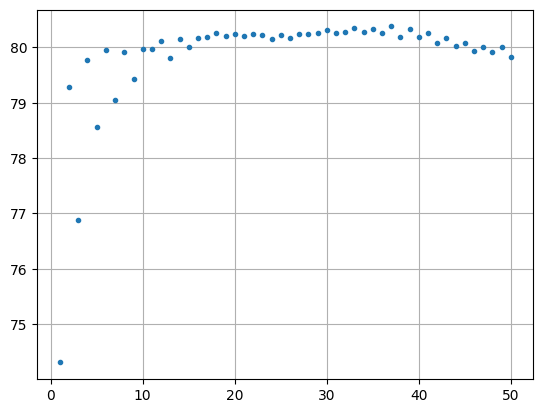

In [19]:
import matplotlib.pyplot as plt
k=list(range(1,51))
plt.plot(k,acc_list,'.')
plt.grid()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_ad_x,train_ad_y)
pred_knn=knn.predict(test_ad_x)
print(confusion_matrix(test_ad_y,pred_knn))
print("----------------------------------------")
print(classification_report(test_ad_y,pred_knn))

[[6875  568]
 [1526  800]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      7443
           1       0.58      0.34      0.43      2326

    accuracy                           0.79      9769
   macro avg       0.70      0.63      0.65      9769
weighted avg       0.76      0.79      0.76      9769



In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_ad_x,train_ad_y)
pred_dt=dt.predict(test_ad_x)
print(confusion_matrix(test_ad_y,pred_dt))
print("----------------------------------------")
print(classification_report(test_ad_y,pred_dt))

[[6511  932]
 [ 880 1446]]
----------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7443
           1       0.61      0.62      0.61      2326

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.82      0.81      0.82      9769

